In [207]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

from datetime import datetime
from copy import copy 

sys.path.insert(0, '../')

from src.utils import total_count


df = pd.read_csv('../data/listings_summary.csv')
pd.options.display.max_columns = 100
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-1

# Exploration 

Number of rows and columns

In [208]:
num_rows = df.shape[0] 
num_cols = df.shape[1]
"The number of rows is {0} and the number of columns is {1}".format(num_rows, num_cols)

'The number of rows is 22552 and the number of columns is 96'

Columns with no null values

In [209]:
no_nulls = set(df.columns.values) - set(df.columns[df.isnull().any()])
print(no_nulls)

{'calendar_updated', 'country_code', 'longitude', 'extra_people', 'require_guest_profile_picture', 'amenities', 'minimum_nights', 'smart_location', 'availability_60', 'availability_30', 'calculated_host_listings_count', 'has_availability', 'last_scraped', 'room_type', 'scrape_id', 'maximum_nights', 'experiences_offered', 'property_type', 'street', 'country', 'accommodates', 'id', 'requires_license', 'availability_90', 'number_of_reviews', 'is_location_exact', 'picture_url', 'latitude', 'host_id', 'price', 'guests_included', 'host_verifications', 'bed_type', 'listing_url', 'host_url', 'is_business_travel_ready', 'instant_bookable', 'availability_365', 'require_guest_phone_verification', 'calendar_last_scraped', 'neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'cancellation_policy'}


columns with most missing 

In [210]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])
print(most_missing_cols)

{'monthly_price', 'square_feet', 'thumbnail_url', 'jurisdiction_names', 'medium_url', 'weekly_price', 'xl_picture_url', 'host_acceptance_rate', 'license'}


### Features that may influence the price 
We will work just with them on the dataset for now

In [282]:
influence_vals =  ["id", "accommodates","bedrooms", "bed_type", "amenities", "price", 
                   "security_deposit", "cleaning_fee", "guests_included", 
                   "extra_people", "minimum_nights", "instant_bookable","latitude", "longitude"]

Dropping NaN values from `price` column

In [325]:
new_df = df[influence_vals]
new_df.head()

,id,accommodates,bedrooms,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,instant_bookable,latitude,longitude
0,2015,3,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",$60.00,$200.00,$30.00,1,$28.00,4,f,52.534537,13.402557
1,2695,2,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",$17.00,$0.00,$0.00,1,$0.00,2,f,52.548513,13.404553
2,3176,4,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",$90.00,$200.00,$50.00,2,$20.00,62,t,52.534996,13.417579
3,3309,2,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",$26.00,$250.00,$30.00,1,$18.00,5,f,52.498855,13.349065
4,7071,2,1.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",$42.00,$0.00,$0.00,1,$24.00,2,f,52.543157,13.415091


# Data Cleaning

In [326]:
#Checking for NaN values
new_df.isnull().sum()

id                     0
accommodates           0
bedrooms              18
bed_type               0
amenities              0
price                  0
security_deposit    9361
cleaning_fee        7146
guests_included        0
extra_people           0
minimum_nights         0
instant_bookable       0
latitude               0
longitude              0
dtype: int64

In [327]:
#fill the NaN values on the columns: 
new_df['security_deposit'].fillna("$0.00", inplace=True)
new_df['cleaning_fee'].fillna("$0.00", inplace=True)
new_df['bedrooms'].fillna(new_df['bedrooms'].mean(), inplace=True)

In [328]:
#Just in case...
fill_df = new_df.dropna()

In [329]:
# transform price, security_deposit and cleaning_fee columns into int 
fill_df['price'] = fill_df['price'].replace('[\$,\.]', '', regex=True).astype(int) / 100
fill_df['cleaning_fee'] = fill_df['cleaning_fee'].replace('[\$,\.]', '', regex=True).astype(int) / 100
fill_df['security_deposit'] = fill_df['security_deposit'].replace('[\$,\.]', '', regex=True).astype(int) / 100
fill_df['extra_people'] = fill_df['extra_people'].replace('[\$,\.]', '', regex=True).astype(int) / 100

In [330]:
# making dummy variables from bed_type column 
bed_type_dummy = pd.get_dummies(fill_df["bed_type"], drop_first=True)
dummy_df = pd.concat([fill_df, bed_type_dummy], axis=1)

In [331]:
# Wifi in amenities - 1 if there is, 0 if not
def wifi(value):
    if "wifi" in value.lower():
        return 1
    else:
        return 0
    
# TV in amenities - 1 if there is, 0 if not    
def tv(value):
    if "tv" in value.lower():
        return 1
    else:
        return 0
    
# "instant_bookable" - 1 if there is True, 0 if is False 
def bookable(value):
    if value == "t":
        return 1
    else:
        return 0
    
dummy_df['Wifi'] = dummy_df['amenities'].apply(wifi)
dummy_df['Tv'] = dummy_df['amenities'].apply(tv)
dummy_df['instant_bookable'] = dummy_df['instant_bookable'].apply(bookable)

In [332]:
dummy_df.head()

,id,accommodates,bedrooms,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,instant_bookable,latitude,longitude,Couch,Futon,Pull-out Sofa,Real Bed,Wifi,Tv
0,2015,3,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",60.0,200.0,30.0,1,28.0,4,0,52.534537,13.402557,0,0,0,1,1,1
1,2695,2,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",17.0,0.0,0.0,1,0.0,2,0,52.548513,13.404553,0,0,0,1,1,0
2,3176,4,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",90.0,200.0,50.0,2,20.0,62,1,52.534996,13.417579,0,0,0,1,1,0
3,3309,2,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",26.0,250.0,30.0,1,18.0,5,0,52.498855,13.349065,0,0,1,0,1,0
4,7071,2,1.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",42.0,0.0,0.0,1,24.0,2,0,52.543157,13.415091,0,0,0,1,1,0


Dropping columns we don't need anymore

In [333]:
dummy_df.drop(['amenities', 'bed_type'], axis = 1, inplace=True)

In [334]:
dummy_df.head()

,id,accommodates,bedrooms,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,instant_bookable,latitude,longitude,Couch,Futon,Pull-out Sofa,Real Bed,Wifi,Tv
0,2015,3,1.0,60.0,200.0,30.0,1,28.0,4,0,52.534537,13.402557,0,0,0,1,1,1
1,2695,2,1.0,17.0,0.0,0.0,1,0.0,2,0,52.548513,13.404553,0,0,0,1,1,0
2,3176,4,1.0,90.0,200.0,50.0,2,20.0,62,1,52.534996,13.417579,0,0,0,1,1,0
3,3309,2,1.0,26.0,250.0,30.0,1,18.0,5,0,52.498855,13.349065,0,0,1,0,1,0
4,7071,2,1.0,42.0,0.0,0.0,1,24.0,2,0,52.543157,13.415091,0,0,0,1,1,0


In [335]:
from geopy.distance import great_circle

def distance_from_downtown(lat, lon):
    berlin_center = (52.520008, 13.404954)
    apartment_spot = (lat, lon)
    return round(great_circle(berlin_center, apartment_spot).km)

dummy_df['distance'] = dummy_df.apply(lambda x: distance_from_downtown(x.latitude, x.longitude), axis=1)
dummy_df.drop(['latitude', 'longitude'], axis=1, inplace=True)
dummy_df.head()

,id,accommodates,bedrooms,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,instant_bookable,Couch,Futon,Pull-out Sofa,Real Bed,Wifi,Tv,distance
0,2015,3,1.0,60.0,200.0,30.0,1,28.0,4,0,0,0,0,1,1,1,2
1,2695,2,1.0,17.0,0.0,0.0,1,0.0,2,0,0,0,0,1,1,0,3
2,3176,4,1.0,90.0,200.0,50.0,2,20.0,62,1,0,0,0,1,1,0,2
3,3309,2,1.0,26.0,250.0,30.0,1,18.0,5,0,0,0,1,0,1,0,4
4,7071,2,1.0,42.0,0.0,0.0,1,24.0,2,0,0,0,0,1,1,0,3


In [354]:
df_final = dummy_df.copy()

# Data Analysis and Vizualization 

In [338]:
accomodates_count = df_final.groupby('accommodates').count().sort_values(by='id', ascending=False).head(8)

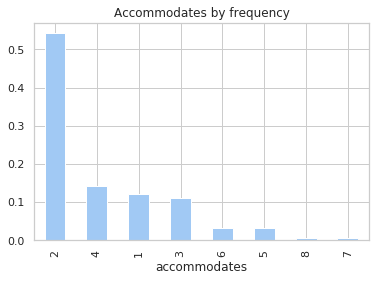

In [339]:
(accomodates_count['id']/df.shape[0]).plot(kind="bar");
plt.title("Accommodates by frequency");

## How the distance from the Berlin's downtown is correlated to the price?

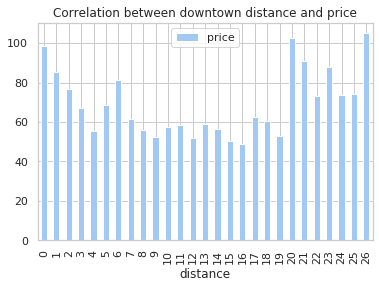

In [352]:
# Correlation between distance from center and price
distance_price = df_final.groupby('distance').mean()['price']
distance_price.plot(kind='bar', legend ='price' );
plt.title('Correlation between downtown distance and price');
plt.show()

We cannot demonstrate anything about it, as it is possible to notice that there is no standardization of the
behavior. Like, the closer the more expensive and the farther the cheaper and vice versa.

 So, which columns have more correlation with price?

In [359]:
df_final.corr().style.format("{:.2}").background_gradient(cmap='coolwarm', axis=1)

,id,accommodates,bedrooms,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,instant_bookable,Couch,Futon,Pull-out Sofa,Real Bed,Wifi,Tv,distance
id,1.0,-0.038,-0.079,0.031,-0.059,-0.091,-0.073,-0.064,-0.042,0.26,-0.041,-0.084,-0.098,0.14,0.0018,-0.065,0.052
accommodates,-0.038,1.0,0.63,0.14,0.12,0.32,0.51,0.24,-0.00019,0.067,-0.022,-0.048,-0.057,0.078,0.014,0.24,0.027
bedrooms,-0.079,0.63,1.0,0.11,0.12,0.25,0.38,0.14,0.005,-0.013,-0.019,-0.025,-0.046,0.055,0.024,0.15,0.037
price,0.031,0.14,0.11,1.0,0.067,0.18,0.1,0.019,0.0036,0.047,-0.0027,-0.013,-0.0058,0.013,-0.0012,0.084,-0.016
security_deposit,-0.059,0.12,0.12,0.067,1.0,0.41,0.097,0.12,0.13,-0.056,-0.0034,-0.0049,-0.0056,0.0089,0.0049,0.11,-0.025
cleaning_fee,-0.091,0.32,0.25,0.18,0.41,1.0,0.26,0.23,0.1,0.006,-0.013,-0.028,-0.018,0.034,0.032,0.21,-0.036
guests_included,-0.073,0.51,0.38,0.1,0.097,0.26,1.0,0.33,0.0097,0.048,-0.014,-0.022,-0.028,0.038,0.028,0.16,-0.0032
extra_people,-0.064,0.24,0.14,0.019,0.12,0.23,0.33,1.0,-0.012,0.022,-0.0052,-0.0028,-0.0055,0.008,0.041,0.091,-0.017
minimum_nights,-0.042,-0.00019,0.005,0.0036,0.13,0.1,0.0097,-0.012,1.0,-0.022,-0.0047,-0.0074,-0.0016,0.0073,-0.0049,0.049,-0.0017
instant_bookable,0.26,0.067,-0.013,0.047,-0.056,0.006,0.048,0.022,-0.022,1.0,-0.013,-0.033,-0.031,0.048,0.0027,0.044,0.043


In [371]:
df_final.cleaning_fee.nunique()
cleaning_price = df_final.sort_values(by='cleaning_fee', ascending=True)

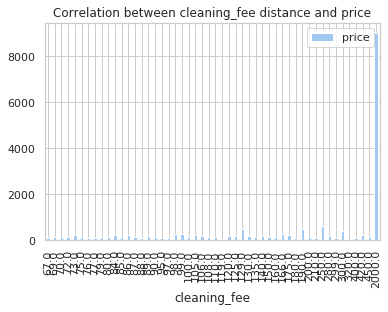

In [374]:
distance_price = df_final.groupby('cleaning_fee').mean()['price'].tail(50)
distance_price.plot(kind='bar', legend ='price');
plt.title('Correlation between cleaning_fee distance and price');
plt.show()

# Modeling

In [281]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    #1
    df  = df.dropna(subset=[response_col], axis=0)

    #2
    df = df.dropna(how='all', axis=1)

    #3
    df = create_dummy_df(df, cat_cols, dummy_na)

    # 4
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #5
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #6
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)
    
    #7
    lm_model = LinearRegression(normalize=True)
    
    #8
    lm_model.fit(X_train, y_train) 

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 
                                                                                           'Salary', 
                                                                                           cat_cols_lst, 
                                                                                           dummy_na=False)